<hr style="height:10px"> 
 
<div class='container2'>	
	<div style='padding: 0 7em 2em 12em;'>
	<h1>Laboratório de Inovação e Automação 1 (LIA 1)</h1>
	<div style="font-size:12pt;float:left;"> 2023/1 | 46M34 | Sala 200 CAE</div><br><br>
    <div style="font-size:12pt;float:left;"><b>Projetos de Inteligência Artificial</b></div>
	</div>
</div>


 <hr style="height:5px"> 

    
<h2>Aula 5 - Preparação e Análise de Dados</h2>

Notebook desenvolvido por: <a href="http://lattes.cnpq.br/1346824250595330">Prof. Dr. Adriano C. Santana</a>

 <hr style="height:2px"> 


In [ ]:
# Confirmar a versão da Linguagem Python instalada
from platform import python_version
print(f'A versão da linguagem Python usada neste projeto é a {python_version()}!')

A versão da linguagem Python usada neste projeto é a 3.10.11!


In [ ]:
# Verificar se o Python está funcionando
print('Bye bye, World!')

Bye bye, World!


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
## 1. Bibliotecas Necessárias para o Notebook (Aula)

Para este notebook, deve ser utilizada a mesma versão apresentada pelo professor da disciplina.

* [`matplotlib`](https://matplotlib.org/): construção e exibição de gráficos genéricos.
* [`seaborn`](https://seaborn.pydata.org/): construção e exibição de gráficos específicos/estatísticas.
* [`numpy`](https://numpy.org): manipulação de dados em formato de vetores e matrizes.
* [`pandas`](https://pandas.pydata.org/pandas-docs/stable/index.html): manipulação de dados em formato de tabelas.

---
## 2. Carregar e Exibir os Dados da Fonte

Primeiro, vamos importar todas as bibliotecas que serão utilizadas no projeto.

In [ ]:
# importar a biblioteca - Todos os projetos passarão pelo Numpy!
import numpy as np

# importar a biblioteca - Excel do Python!
import pandas as pd 

# importar as bibliotecas - Visualizar dados!
import seaborn as sns
import matplotlib.pyplot as plt

print('Bibliotecas carregadas com sucesso!')

# Instalação silenciosa
#!pip install -q numpy

Bibliotecas carregadas com sucesso!


---
## 3. Introdução ao Dados

A cada dia, uma enorme quantidade de dados é gerada de diferentes fontes. Um conjunto de dados é formado por objetos que representam algo físico (cadeira) ou abstrato (diagnóstico), sendo descrito por seus atributos. Deve-se realizar a caracterização dos dados e a exploração inicial com estatística e visualização básicas, conhecido como pré-processamento.

O pré-processamento pode demandar tarefas de integração, eliminação manual, amostragem, balanceamento, limpeza, redução da dimensionalidade, transformação de dados etc., estando essas tarefas associadas à Mineração de Dados (MD), a qual foca no processo em si, em como realizar essas tarefas.

A MD busca extrair conhecimento novo, útil e relevante, gerando as bases para a Ciência de Dados (CD), a qual foca no impacto e na relevância do conhecimento.

#### Em resumo, MD (processo) e CD (dados)!

---
## Caracterização de dados

Considere o conjunto de dados provenientes de pacientes de um hospital, denominado `hospital`.

In [ ]:
# importar o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv ( '/content/drive/MyDrive/LIA1/Hospital/hospital2.txt', sep=',', index_col=None)

print('Dados importados com sucesso!')

Dados importados com sucesso!


In [ ]:
# exibir uma amostra do dataframe
display(df_dataset.head())

,Id,Nome,Idade,Sexo,Peso,Manchas,Temp,Internação,Estado,Time,Diagnóstico
0,4201,João,55,M,90.0,Concentradas,38.0,2,SP,Palmeiras,Doente
1,3217,Maria,56,F,91.0,Inexistentes,39.5,4,MG,Cruzeiro,Doente
2,4039,Luiz,49,M,92.0,Espalhadas,38.0,2,RS,Grêmio,Saudável
3,1920,José,57,M,93.0,Inexistentes,38.5,2,MG,Atlético,Doente
4,4340,Cláudia,21,F,52.0,Uniformes,37.6,1,PE,Sport,Saudável


In [ ]:
# exibir todo dataframe
display(df_dataset)

,Id,Nome,Idade,Sexo,Peso,Manchas,Temp,Internação,Estado,Time,Diagnóstico
0,4201,João,55,M,90.0,Concentradas,38.0,2,SP,Palmeiras,Doente
1,3217,Maria,56,F,91.0,Inexistentes,39.5,4,MG,Cruzeiro,Doente
2,4039,Luiz,49,M,92.0,Espalhadas,38.0,2,RS,Grêmio,Saudável
3,1920,José,57,M,93.0,Inexistentes,38.5,2,MG,Atlético,Doente
4,4340,Cláudia,21,F,52.0,Uniformes,37.6,1,PE,Sport,Saudável
5,2301,Ana,58,F,94.0,Inexistentes,38.0,3,RJ,Botafogo,Doente
6,1322,Marta,19,F,87.0,Espalhadas,39.0,3,AM,Flamengo,Doente
7,3027,Paulo,34,M,67.0,Uniformes,38.4,2,GO,Vila Nova,Saudável
8,3546,Roberto,44,M,NaN,Uniformes,37.6,1,PE,Sport,Saudável
9,6754,Lorena,33,F,72.0,Inexistentes,38.0,3,RJ,Botafogo,Doente


Cada objeto corresponde a um paciente, sendo formado pelos atributos de entrada referentes ao paciente. 

Os atributos (identificação; nome; idade; sexo; peso; internação; estado; time; sintomas e resultados clínicos. Os sintomas são (manchas; e temperatura). O atributo alvo: `diagnóstico`. *Esse atributo alvo é necessário em tarefas preditivas. Em tarefas descritivas é desnecessário!*

<Axes: ylabel='Internação'>

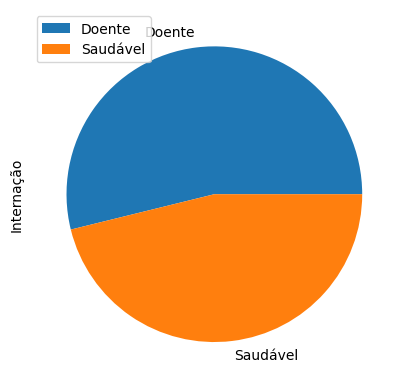

In [ ]:
df_dataset.groupby('Diagnóstico').count().plot.pie(y = 'Internação')

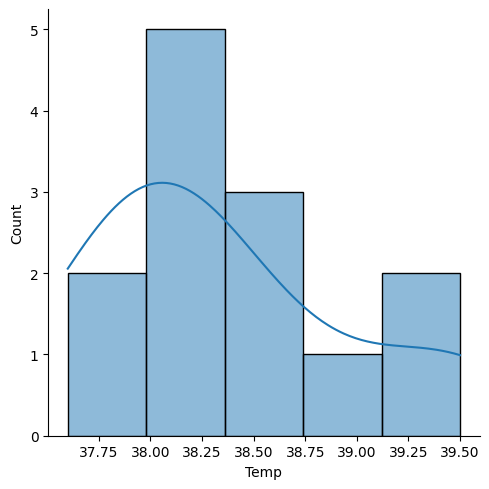

In [ ]:
sns.displot(data=df_dataset, x="Temp", kde=True)

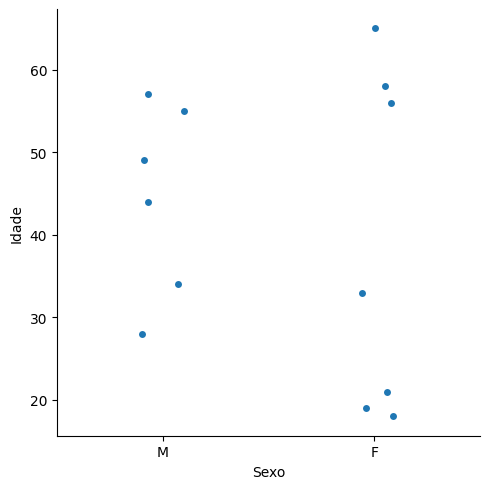

In [ ]:
sns.catplot(data=df_dataset, x="Sexo", y="Idade")

<BarContainer object of 13 artists>

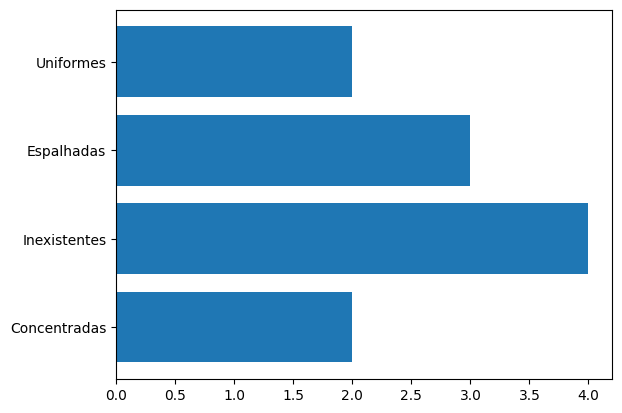

In [ ]:

plt.barh(df_dataset.Manchas, df_dataset.Internação, align='center')

<BarContainer object of 13 artists>

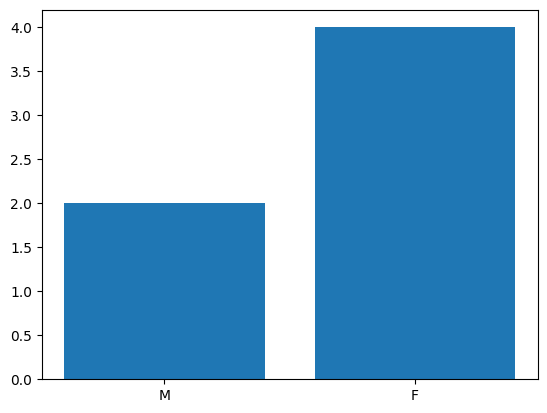

In [ ]:
plt.bar(df_dataset.Sexo, df_dataset.Internação)

In [ ]:
print(df_dataset)

      Id     Nome  Idade Sexo  Peso       Manchas  Temp  Internação Estado  \
0   4201     João     55    M  90.0  Concentradas  38.0           2     SP   
1   3217    Maria     56    F  91.0  Inexistentes  39.5           4     MG   
2   4039     Luiz     49    M  92.0    Espalhadas  38.0           2     RS   
3   1920     José     57    M  93.0  Inexistentes  38.5           2     MG   
4   4340  Cláudia     21    F  52.0     Uniformes  37.6           1     PE   
5   2301      Ana     58    F  94.0  Inexistentes  38.0           3     RJ   
6   1322    Marta     19    F  87.0    Espalhadas  39.0           3     AM   
7   3027    Paulo     34    M  67.0     Uniformes  38.4           2     GO   
8   3546  Roberto     44    M   NaN     Uniformes  37.6           1     PE   
9   6754   Lorena     33    F  72.0  Inexistentes  38.0           3     RJ   
10  9834    Laura     65    F   NaN     Uniformes  38.4           2     GO   
11  4201     João     28    M  79.0  Concentradas  38.0         

---
## Considerações finais:

Antes de aplicar algoritmos de AM a um conjunto de dados, é importante que os dados sejam analisados. Essa análise, que pode ser realizada por técnicas estatísticas e de visualização, permite uma melhor compreensão da distribuição dos dados e pode dar suporte à escolha de formas de abordar o problema.

Foram apresentados conceitos considerados importantes para analisar os principais aspectos de um conjunto de dados. Após uma caracterização dos tipos de dados, foram apresentadas algumas técnicas